In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('titanic.csv')

In [5]:
data

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df = pd.DataFrame(data)

In [9]:
df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
def print_section(title):
    print(f"\n{'-'*60}\n{title}\n{'-'*60}")
# 1. Two-Sample t-test: Age difference between survivors and non-survivors
print_section("1. Two-Sample t-test: Age difference between survivors and non-survivors")
print("H0: There is no significant difference in the mean age between survivors and non-survivors")
print("H1: There is a significant difference in the mean age between survivors and non-survivors")


------------------------------------------------------------
1. Two-Sample t-test: Age difference between survivors and non-survivors
------------------------------------------------------------
H0: There is no significant difference in the mean age between survivors and non-survivors
H1: There is a significant difference in the mean age between survivors and non-survivors


In [17]:
survivors_age = df[df['survived'] == 1]['age'].dropna()
non_survivors_age = df[df['survived'] == 0]['age'].dropna()

In [19]:
t_statistic, p_value = stats.ttest_ind(survivors_age, non_survivors_age)
print(f"t-statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

t-statistic: -2.0667
p-value: 0.0391


In [21]:
if p_value < 0.05:
    print("Reject H0: There is a significant difference in the mean age between survivors and non-survivors")
else:
    print("Fail to reject H0: There's not enough evidence to conclude a difference in mean age")

Reject H0: There is a significant difference in the mean age between survivors and non-survivors


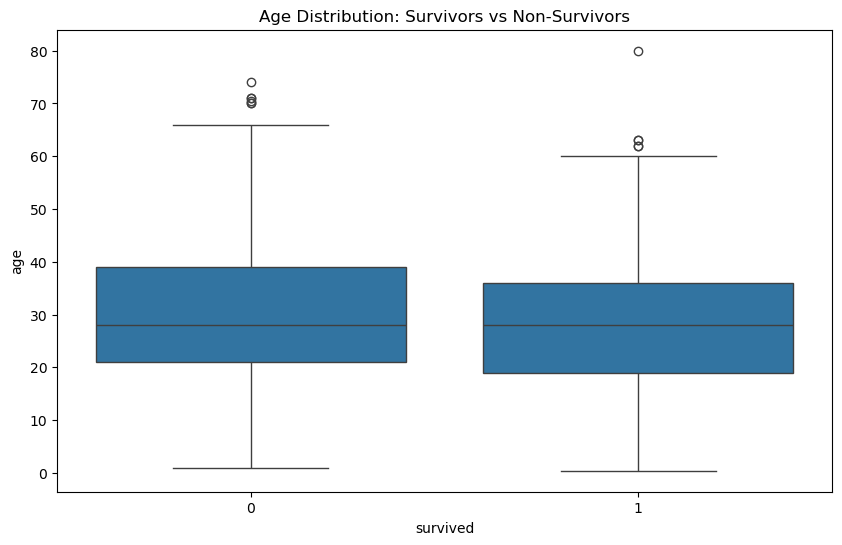

In [23]:
# Visualize the results
plt.figure(figsize=(10, 6))
sns.boxplot(x='survived', y='age', data=df)
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.show()

In [25]:
# 2. Chi-square test: Association between passenger class and survival
print_section("2. Chi-square test: Association between passenger class and survival")
print("H0: There is no association between passenger class and survival")
print("H1: There is an association between passenger class and survival")


------------------------------------------------------------
2. Chi-square test: Association between passenger class and survival
------------------------------------------------------------
H0: There is no association between passenger class and survival
H1: There is an association between passenger class and survival


In [27]:
contingency_table = pd.crosstab(df['pclass'], df['survived'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"p-value: {p_value:.4f}")

Chi-square statistic: 102.8890
p-value: 0.0000


In [29]:
if p_value < 0.05:
    print("Reject H0: There is a significant association between passenger class and survival")
else:
    print("Fail to reject H0: There's not enough evidence to conclude an association")

Reject H0: There is a significant association between passenger class and survival


In [31]:
# 3. One-way ANOVA: Fare differences among passenger classes
print_section("3. One-way ANOVA: Fare differences among passenger classes")
print("H0: The mean fare is the same for all passenger classes")
print("H1: At least one passenger class has a different mean fare")


------------------------------------------------------------
3. One-way ANOVA: Fare differences among passenger classes
------------------------------------------------------------
H0: The mean fare is the same for all passenger classes
H1: At least one passenger class has a different mean fare


In [33]:
first_class = df[df['pclass'] == 1]['fare']
second_class = df[df['pclass'] == 2]['fare']
third_class = df[df['pclass'] == 3]['fare']

In [35]:
f_statistic, p_value = stats.f_oneway(first_class, second_class, third_class)
print(f"F-statistic: {f_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

F-statistic: 242.3442
p-value: 0.0000


In [37]:
if p_value < 0.05:
    print("Reject H0: There are significant differences in mean fares among passenger classes")
else:
    print("Fail to reject H0: There's not enough evidence to conclude differences in mean fares")

Reject H0: There are significant differences in mean fares among passenger classes
